# **Diabetes Prediction System**

---

A machine learning-based system to predict the presence of diabetes using non-tree-based classification algorithms.

**Mounting Google Drive**

To get started, we begin by mounting Google Drive and navigating to the project directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Navigating to Dataset Directory**

To work with our dataset, we navigate to the dataset directory.

In [ ]:
cd drive/MyDrive/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Diabetes

/content/drive/MyDrive/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Diabetes


**Listing Available Files**

Searching for the dataset.

In [ ]:
ls

diabetes.csv
diabetes_GaussianNB_model.pkl
diabetes_GaussianNB_smote_model.pkl
diabetes_KNeighborsClassifier_model.pkl
diabetes_KNeighborsClassifier_smote_model.pkl
diabetes_LogisticRegression_model.pkl
diabetes_LogisticRegression_smote_model.pkl
diabetes_processed.csv
diabetes_SVC_model.pkl
diabetes_SVC_smote_model.pkl
diabetes_VotingClassifier_model.pkl
diabetes_VotingClassifier_smote_model.pkl


**Importing Required Libraries**

We begin by importing essential Python libraries for data manipulation, numerical operations, and visualization:

*   pandas for data manipulation and analysis
*   numpy for numerical operations
*   matplotlib for plotting and visualizations
*   seaborn for statistical data visualization

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Loading the Diabetes Dataset**

Next, we load the diabetes dataset into a pandas DataFrame.

In [ ]:
df_diabetes=pd.read_csv('diabetes.csv')

**Exploring the Dataset**

To better understand the structure of the dataset, we can inspect few rows.

In [ ]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Renaming the Target Column**

To make the dataset more intuitive and consistent with our use case, we rename the Outcome column to Diabetes, which clearly reflects the prediction target.

In [ ]:
df_diabetes = df_diabetes.rename(columns={'Outcome': 'Diabetes'})

**Verifying the Column Rename**

We check the updated column names to confirm that Outcome has been successfully renamed to Diabetes.

In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

**Descriptive Statistics of the Dataset**

We explore key numerical summaries of each feature in the diabetes dataset to better understand its structure and quality.

These include:

*   Count: Total number of non-missing entries in each column
*   Mean: The average value across all entries
*   Standard Deviation: A measure of how much the values vary
*   Minimum and Maximum: The range of values present
*   25%, 50%, 75% Percentiles: Helpful for analyzing the distribution and spotting skewed data

In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Dataset Structure and Data Types**

We inspect the structure of the dataset to understand:

*   The number of entries (rows)
*   Column names and their data types
*   The presence of null (missing) values

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking for Missing Values**

We perform a column-wise check to see if any feature contains missing (null) values.

This confirms that there are no missing values in the dataset.

In [ ]:
df_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diabetes,0


**Checking for Zero (0) Values**

We perform a column-wise check to identify if any feature contains zero (0) values, which may indicate missing or invalid data in the dataset.

This confirms that there are zero values (potentially representing missing data) in the following columns: Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

In [ ]:
(df_diabetes==0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Diabetes,500


**Replacing Zero (0) Values with NaN for Imputation**

In some datasets, zero (0) values may indicate missing or invalid data rather than actual values. To handle this, we replace these zero values with NaN (Not a Number), so that we can later impute them (fill them in with reasonable values).

We specifically target the following columns for this replacement: Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

In [ ]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_diabetes[cols_to_impute] = df_diabetes[cols_to_impute].replace(0, np.nan)

**Checking the Zero-to-Null Replacement**

After replacing the zero (0) values with NaN in the specified columns, we can verify that the replacement was successful by checking for missing values (nulls) in the dataset.

In [ ]:
df_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Diabetes,0


**Missing Data Visualization**

We visualize the missing values in the df_heart dataset using the missingno matrix plot to understand the pattern and distribution of missing data.

The matrix provides:

*   **White Spaces:** Indicate the missing values.
*   **Dark Spaces:** Indicate the non-missing values.
*   **Column Ordering:** The columns are arranged based on nullity correlation, helping to reveal patterns in missingness across features.

<Figure size 1200x800 with 0 Axes>

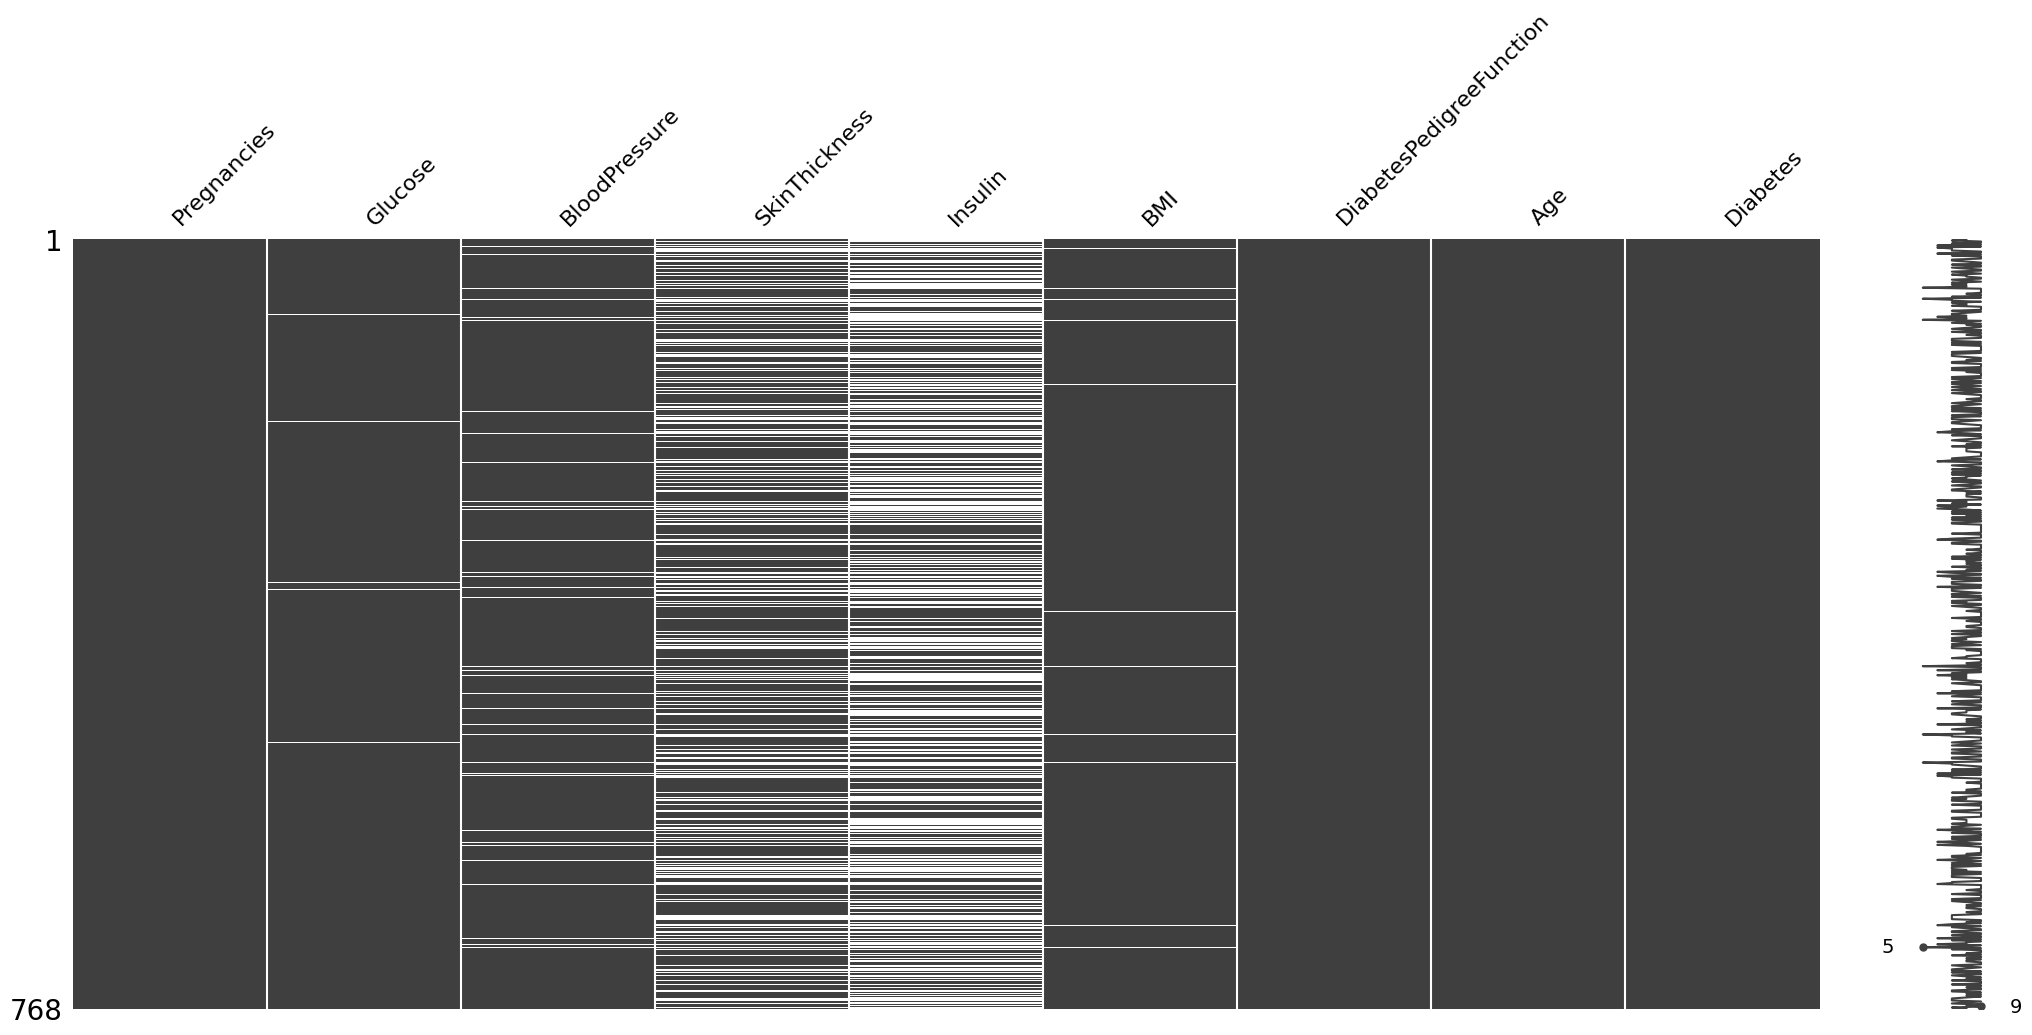

In [ ]:
import missingno as msno
plt.figure(figsize=(12, 8))
msno.matrix(df_diabetes)
plt.show()

**Histogram of Features**

We generate histograms for the numerical features in the df_diabetes dataset to better understand their distributions.

The histogram helps us visualize:

*   The distribution of each feature, showing how the values are spread across different ranges.
*   The frequency of each value for each feature (e.g., how many individuals have a certain range of BMI or Age).
*   Helps identify skewness (whether data is right or left-skewed) and outliers (extremely high or low values).

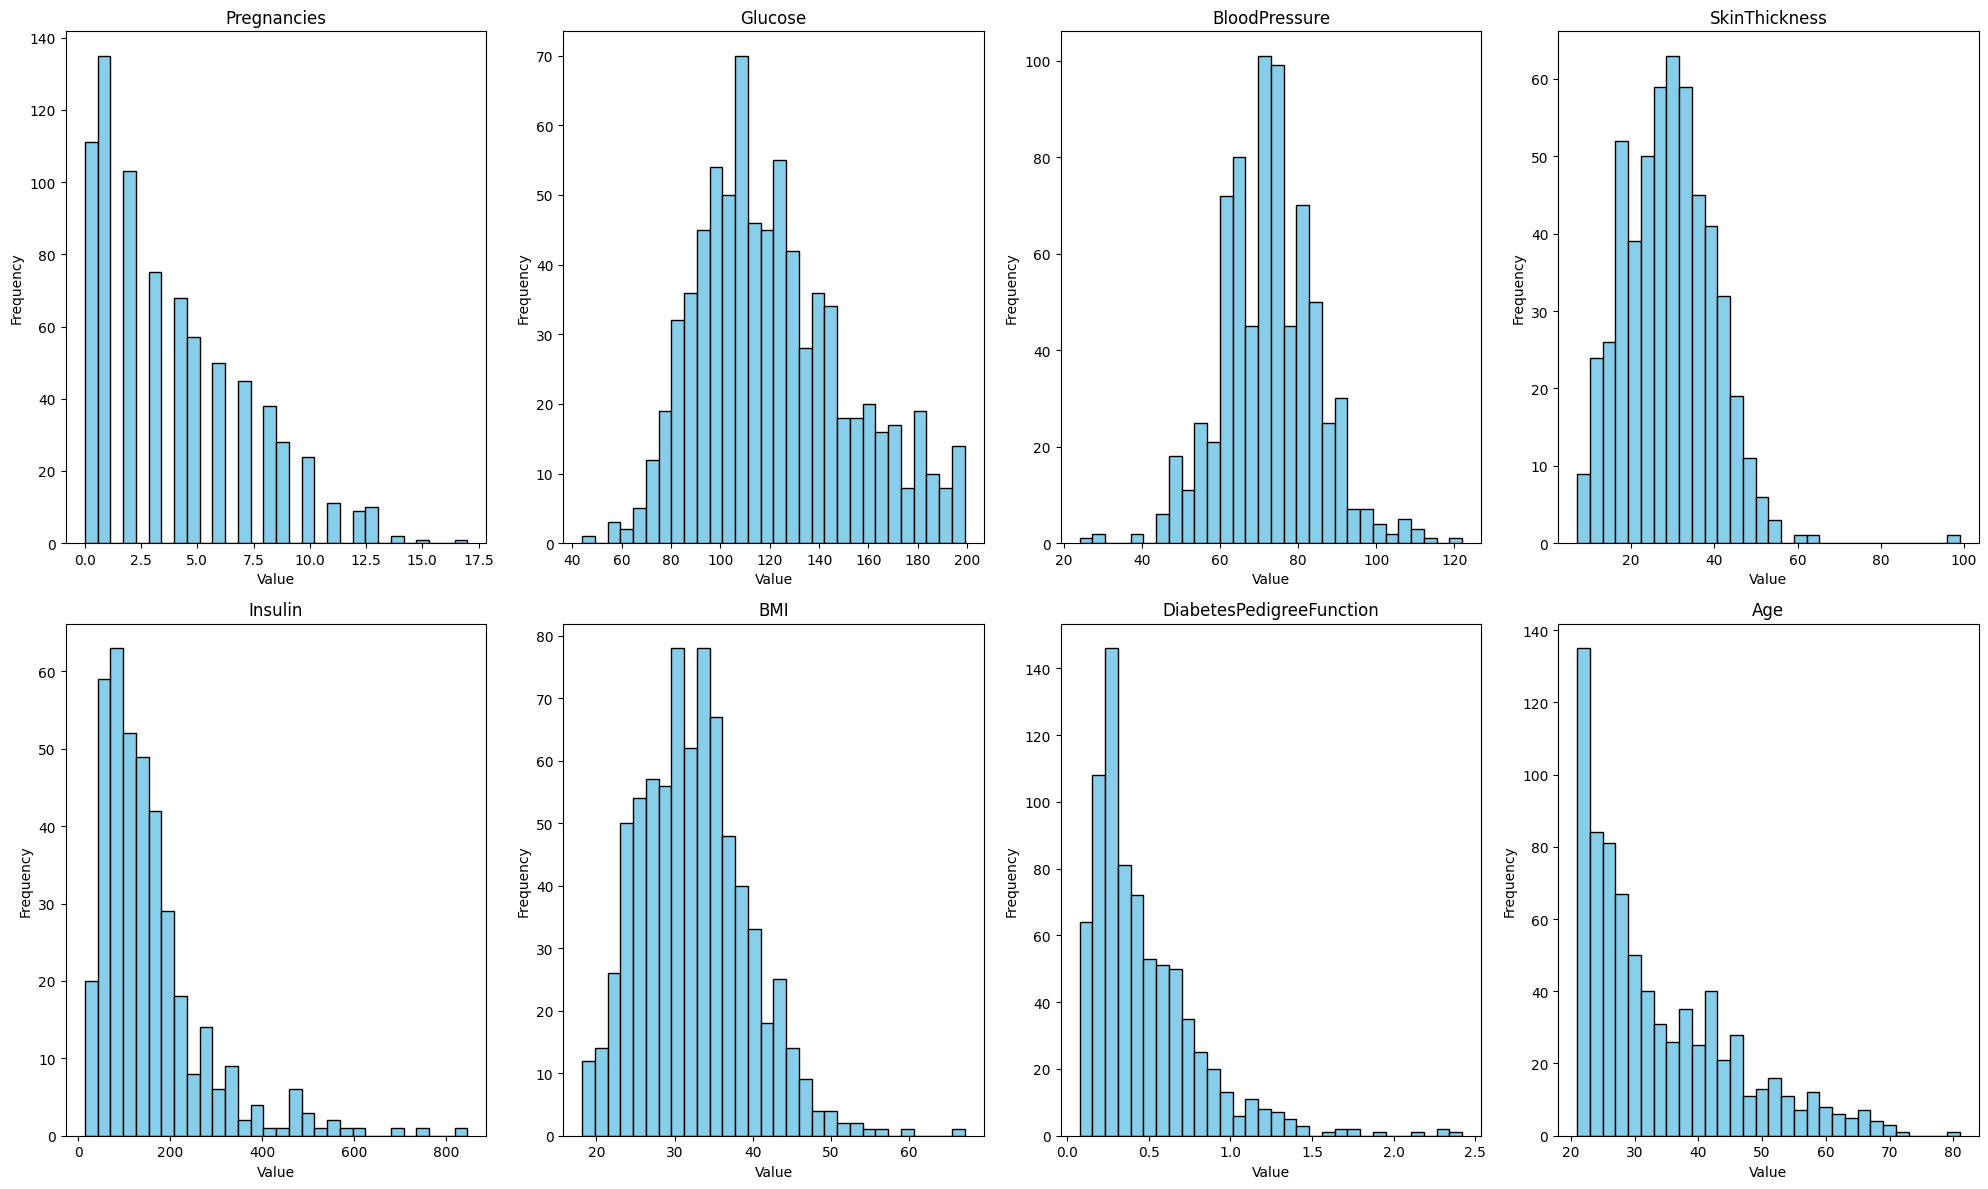

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(features):
    axes[i].hist(df_diabetes[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
for j in range(len(features), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

**Violin Plots of Features**

We use violin plots to visualize the distribution of features in the df_diabetes dataset. Each violin plot displays the distribution of data for a specific feature, providing insights into the underlying data distribution, spread, and potential outliers.

The violin plots show:

*   **Distribution:** The width of the plot at different values indicates the density of data points. Wider sections represent higher data density.
*   **Median:** The central line inside the violin represents the median value of the feature.
*   **Range:** The shape of the violin extends to the minimum and maximum values, showing the overall spread of the feature.
*   **Outliers:** The plots also help identify any potential outliers in the data.

Each subplot represents a feature, allowing for easy comparison between the features.

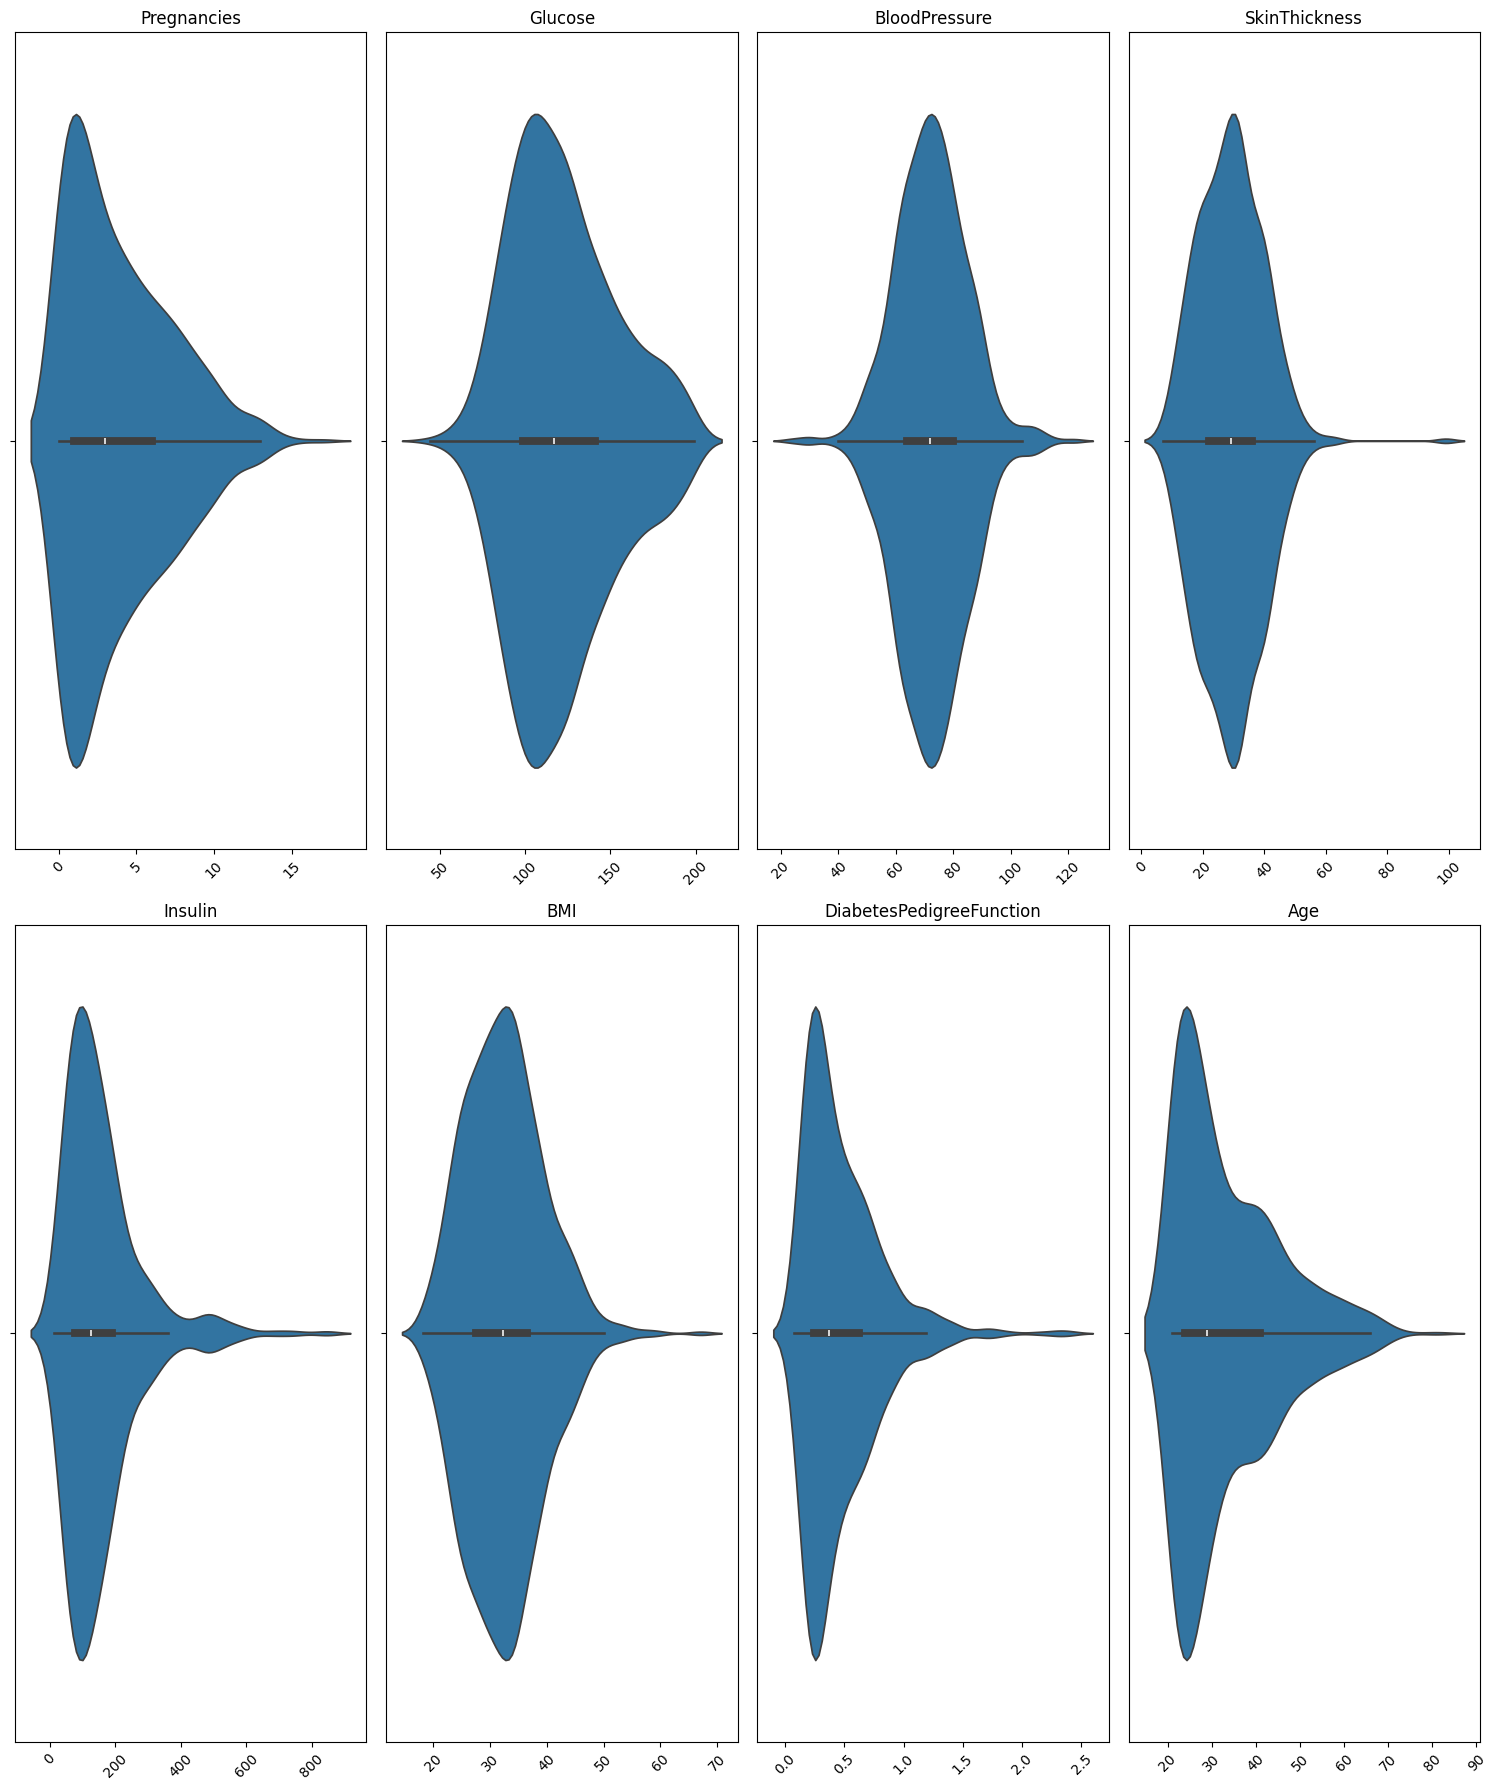

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_long = df_diabetes[features].melt(var_name='Feature', value_name='Value')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 18))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='Value', data=df_long[df_long['Feature'] == feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**Strip Plot of All Features Grouped by Diabetes**

This strip plot visualizes the distribution of various features with respect to diabetes status:

Each point represents an individual data entry.

Features are shown on the y-axis, and their corresponding values on the x-axis.

Points are color-coded based on diabetes status (positive or negative).

The dodge=True argument helps separate overlapping points by class for better visibility.

This plot is useful for identifying patterns, clusters, and outliers across features like Glucose, BMI, Insulin, etc.

It provides a compact yet detailed view of how feature values differ between diabetic and non-diabetic individuals.

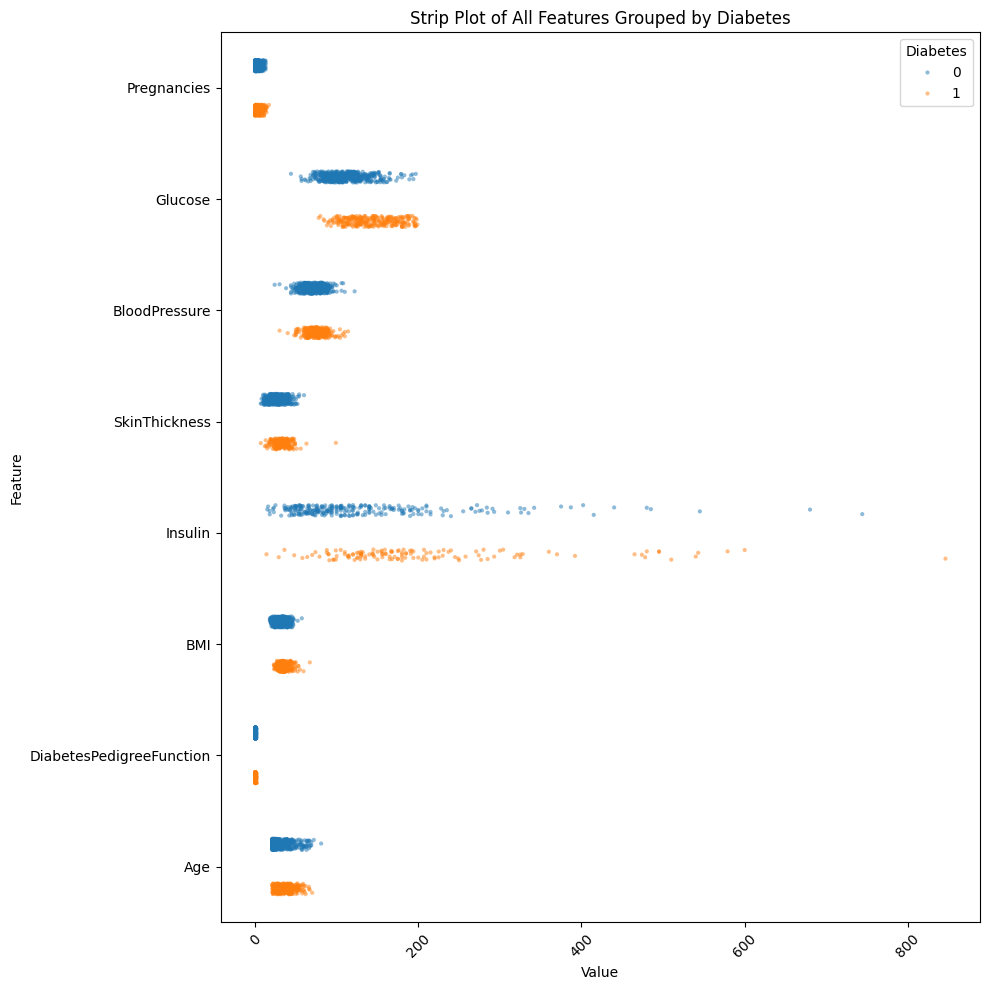

In [ ]:
melted_df = df_diabetes.melt(id_vars='Diabetes', value_vars=['Pregnancies', 'Glucose', 'BloodPressure',
                            'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
                            var_name='Feature', value_name='Value')
plt.figure(figsize=(10, 10))
sns.stripplot(x='Value', y='Feature', hue='Diabetes', data=melted_df, dodge=True, size=3, alpha=0.5)
plt.title('Strip Plot of All Features Grouped by Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Boxplot of Features**

We generate a boxplot to visually examine the distribution and outliers of the numerical features in the df_diabetes dataset.

The boxplot displays:

*   The median (central line within the box) for each feature.
*   The interquartile range (IQR) represented by the box (between the 25th and 75th percentiles).
*   Outliers are represented as dots outside the whiskers of the box.
*   The whiskers show the spread of data (the range of values within the IQR).

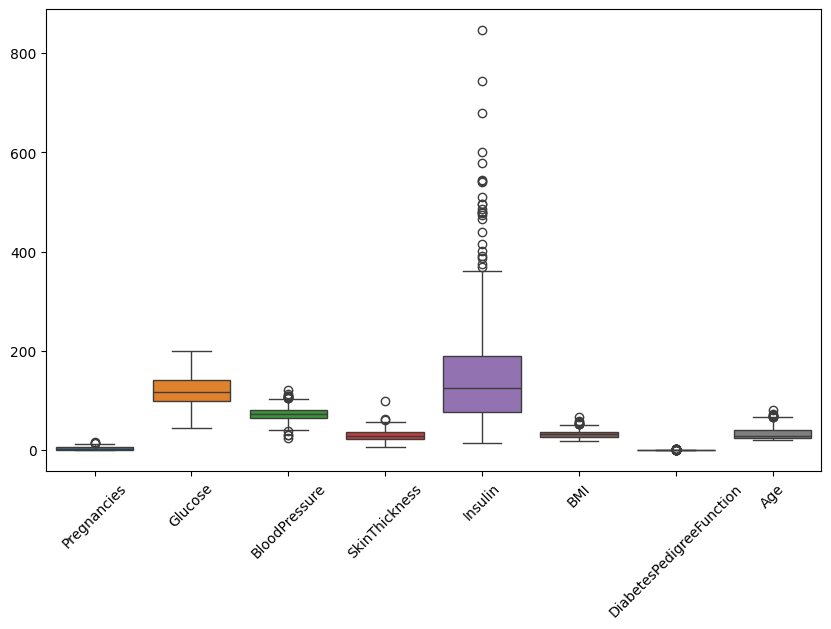

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.xticks(rotation=45)
plt.show()

**Handling Outliers Using IQR (Interquartile Range)**

To deal with outliers, we use the Interquartile Range (IQR) method, which identifies values that fall outside a certain range (1.5 times the IQR above the third quartile and below the first quartile). These outliers can be clipped to the nearest acceptable value to prevent them from skewing the data.

We apply this to the following features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    Q1 = df_diabetes[feature].quantile(0.25)
    Q3 = df_diabetes[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_diabetes[feature] = df_diabetes[feature].clip(lower, upper)

**Boxplot After Outlier Treatment**

We visualize the distribution of features in the df_diabetes dataset using a boxplot to check if the outliers have been successfully treated.

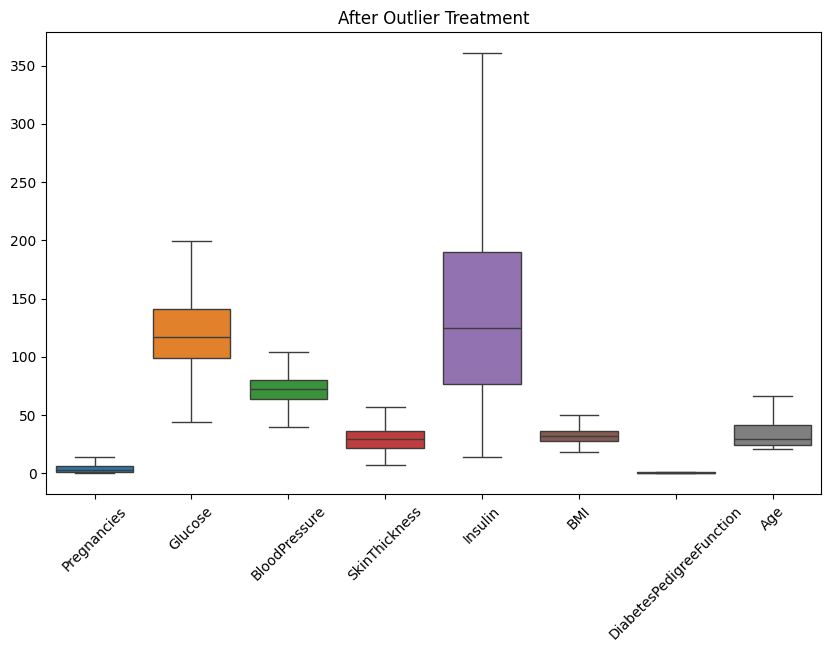

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title("After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

**Imputing Missing Values Using KNN (K-Nearest Neighbors)**

To handle the missing values in the dataset, we can use KNN imputation. This technique estimates missing values based on the values of the nearest neighbors (similar instances). In our case, we use 5 nearest neighbors to impute missing values.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_diabetes[:] = imputer.fit_transform(df_diabetes)

**Verifying Missing Values After Imputation**

After performing the KNN imputation, it's important to verify that all missing values have been filled. We can do this by checking for any remaining null (missing) values in the dataset.

In [ ]:
df_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Diabetes,0


**Data Type Correction After Outlier Handling (Clipping) & KNN Imputation**

After performing outlier handling (clipping) and imputation (KNN), it's important to ensure the dataset has the correct data types for each feature.

Rounding and Converting Pregnancies and Age to Integer Type: These columns are counts and should remain as integers. Rounding to the nearest integer ensures there are no floating point values.


In [ ]:
df_diabetes['Pregnancies']=df_diabetes['Pregnancies'].round().astype(int)
df_diabetes['Age']=df_diabetes['Age'].round().astype(int)

**Descriptive Statistics of the Dataset After Imputation**

After handling missing values and checking for zero values, it's important to examine the summary statistics of the dataset to understand the distribution and range of the features.

In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.839844,121.598177,72.333333,29.046094,144.479036,32.361523,0.458914,33.194010,0.348958
std,3.351876,30.496543,11.806490,9.070692,75.944202,6.679825,0.285596,11.611715,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,132.900000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,184.425000,36.600000,0.626250,41.000000,1.000000
max,14.000000,199.000000,104.000000,57.000000,360.625000,50.250000,1.200000,66.000000,1.000000


**Checking for Duplicate Entries**

We check for any duplicate rows in the df_diabetes dataset.

This confirms that there are no duplicate values in the dataset.

In [ ]:
df_diabetes.duplicated().sum()

np.int64(0)

**Handling Duplicate Entries**

We remove any duplicate rows from the df_diabetes dataset.

In [ ]:
df_diabetes.drop_duplicates(inplace=True)
df_diabetes.duplicated().sum()

np.int64(0)

**Checking the Dataset Shape**

We check the shape of the df_diabetes dataset to confirm the number of rows and columns after cleaning.

There is no change because there were no missing or duplicate values.

In [ ]:
df_diabetes.shape

(768, 9)

**Class Distribution of Diabetes**

We check how many records belong to each class of the target variable Diabetes (0 for non-diabetic, 1 for diabetic).

The dataset is imbalanced with:

*   500 instances of class 0 (non-diabetic)
*   268 instances of class 1 (diabetic)

In [ ]:
len(df_diabetes.loc[df_diabetes['Diabetes'] == 0])

500

In [ ]:
len(df_diabetes.loc[df_diabetes['Diabetes'] == 1])

268

**Visualizing Class Distribution of Diabetes**

We use a count plot to visualize the distribution of the target variable Diabetes.

The plot clearly shows the distribution of the target variable, revealing that the dataset is imbalanced, with more instances of non-diabetic patients (class 0) compared to diabetic patients (class 1).

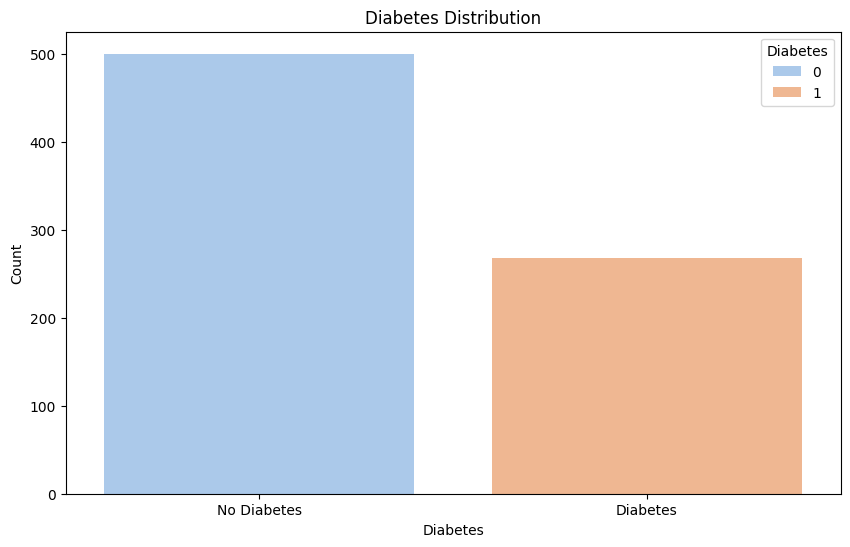

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_diabetes, x='Diabetes', palette='pastel', hue='Diabetes')
plt.xticks([0, 1], ["No Diabetes", "Diabetes"])
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Diabetes Distribution")
plt.show()

**Correlation Matrix of Features**

We calculate the correlation between the numerical features in the df_diabetes dataset.

This returns a correlation matrix, showing how strongly each pair of features is related (ranging from -1 to 1). A correlation closer to 1 indicates a strong positive relationship, while a correlation closer to -1 indicates a strong negative relationship.

In [ ]:
df_diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.130155,0.219891,0.108709,0.082457,0.029211,-0.017522,0.549733,0.220946
Glucose,0.130155,1.000000,0.235795,0.236466,0.665309,0.240975,0.120651,0.272431,0.495853
BloodPressure,0.219891,0.235795,1.000000,0.243031,0.156539,0.300520,0.022806,0.345847,0.180286
SkinThickness,0.108709,0.236466,0.243031,1.000000,0.264377,0.666466,0.093191,0.141614,0.281126
Insulin,0.082457,0.665309,0.156539,0.264377,1.000000,0.293413,0.118560,0.247946,0.354494
BMI,0.029211,0.240975,0.300520,0.666466,0.293413,1.000000,0.140280,0.039097,0.315102
DiabetesPedigreeFunction,-0.017522,0.120651,0.022806,0.093191,0.118560,0.140280,1.000000,0.047236,0.184969
Age,0.549733,0.272431,0.345847,0.141614,0.247946,0.039097,0.047236,1.000000,0.243185
Diabetes,0.220946,0.495853,0.180286,0.281126,0.354494,0.315102,0.184969,0.243185,1.000000


**Correlation Heatmap of Features**

We visualize the correlation matrix using a heatmap to better understand the relationships between the features.

The heatmap provides a visual representation of the correlation values, with a color gradient indicating the strength of the correlation:

*   Cooler colors represent negative correlations.
*   Warmer colors represent positive correlations.

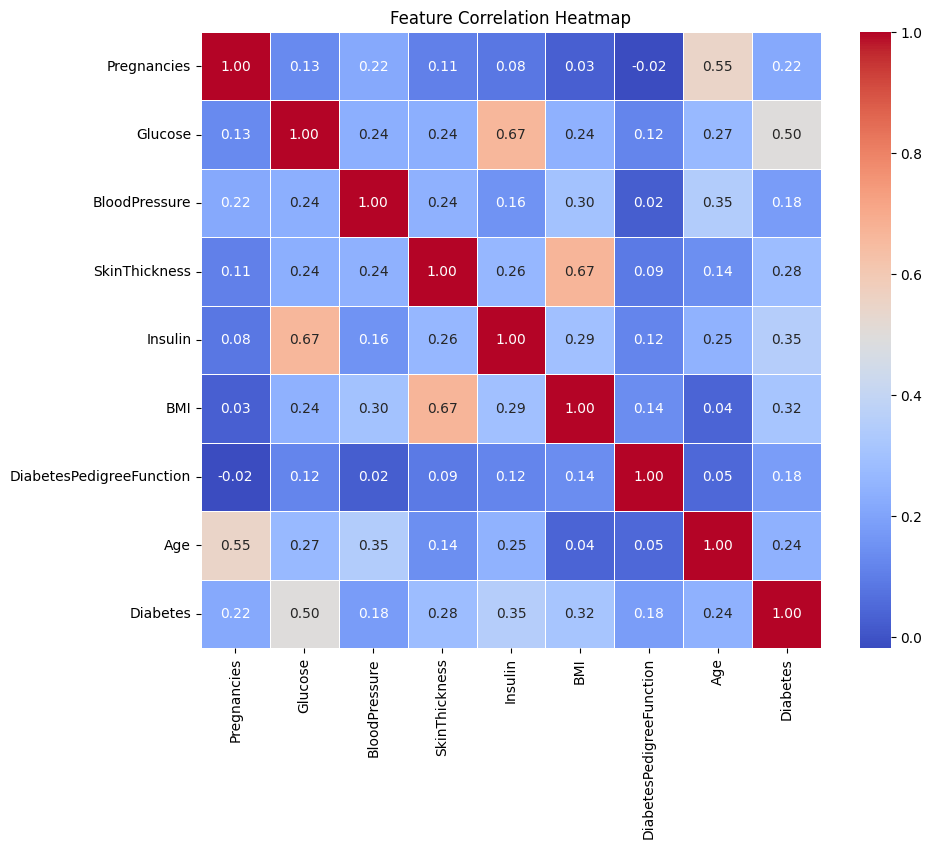

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_diabetes.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Checking for Multicollinearity using VIF**

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated. This can negatively impact the interpretability and performance of certain models. To detect multicollinearity, we calculate the Variance Inflation Factor (VIF) for each feature.

VIF Range	Interpretation:



*   `1	No multicollinearity`
*   `1–5	Moderate correlation (acceptable)`
*   `>5	High correlation (consider action)`
*   `>10	Very high (strong multicollinearity)`

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df_diabetes[features]
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Feature        VIF
0                     const  57.341637
1               Pregnancies   1.449443
2                   Glucose   1.881100
3             BloodPressure   1.276959
4             SkinThickness   1.856885
5                   Insulin   1.901080
6                       BMI   1.995090
7  DiabetesPedigreeFunction   1.034199
8                       Age   1.677154


**Correlation of Features with the Target (Diabetes)**

We examine the correlation of each feature with the target variable Diabetes by sorting the values in descending order.

This shows which features have the strongest and weakest correlations with the target variable Diabetes.

Key Observations:

*   Highly Correlated with the Target (Diabetes):
    *   Glucose (0.49)

*   Moderately Correlated with the Target (Diabetes):
    *   Insulin (0.35)
    *   BMI (0.31)
    *   SkinThickness (0.28)
    *   Age (0.24)
    *   Pregnancies (0.22)

*   Weak or No Correlation with the Target (Diabetes):
    *   DiabetesPedigreeFunction (0.18)
    *   BloodPressure (0.18)

In [ ]:
df_diabetes.corr()["Diabetes"].sort_values(ascending=False)

,Diabetes
Diabetes,1.000000
Glucose,0.495853
Insulin,0.354494
BMI,0.315102
SkinThickness,0.281126
Age,0.243185
Pregnancies,0.220946
DiabetesPedigreeFunction,0.184969
BloodPressure,0.180286


**Pairplot of Features**

We create a pairplot to visualize the relationships between multiple features in the df_diabetes dataset, grouped by the target variable Diabetes.

The pairplot helps us visualize:

*   Pairwise relationships between features.
*   Distribution of each feature and its separation based on the target variable Diabetes.
*   The hue (color) indicates whether the sample has diabetes (1) or not (0), providing insight into how different features vary across the two diabetes classes.

In [ ]:
sns.pairplot(df_diabetes, hue="Diabetes")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Histogram of Features**

We generate histograms for the numerical features in the df_diabetes dataset to better understand their distributions.

The histogram helps us visualize:

*   The distribution of each feature, showing how the values are spread across different ranges.
*   The frequency of each value for each feature (e.g., how many individuals have a certain range of BMI or Age).
*   Helps identify skewness (whether data is right or left-skewed) and outliers (extremely high or low values).

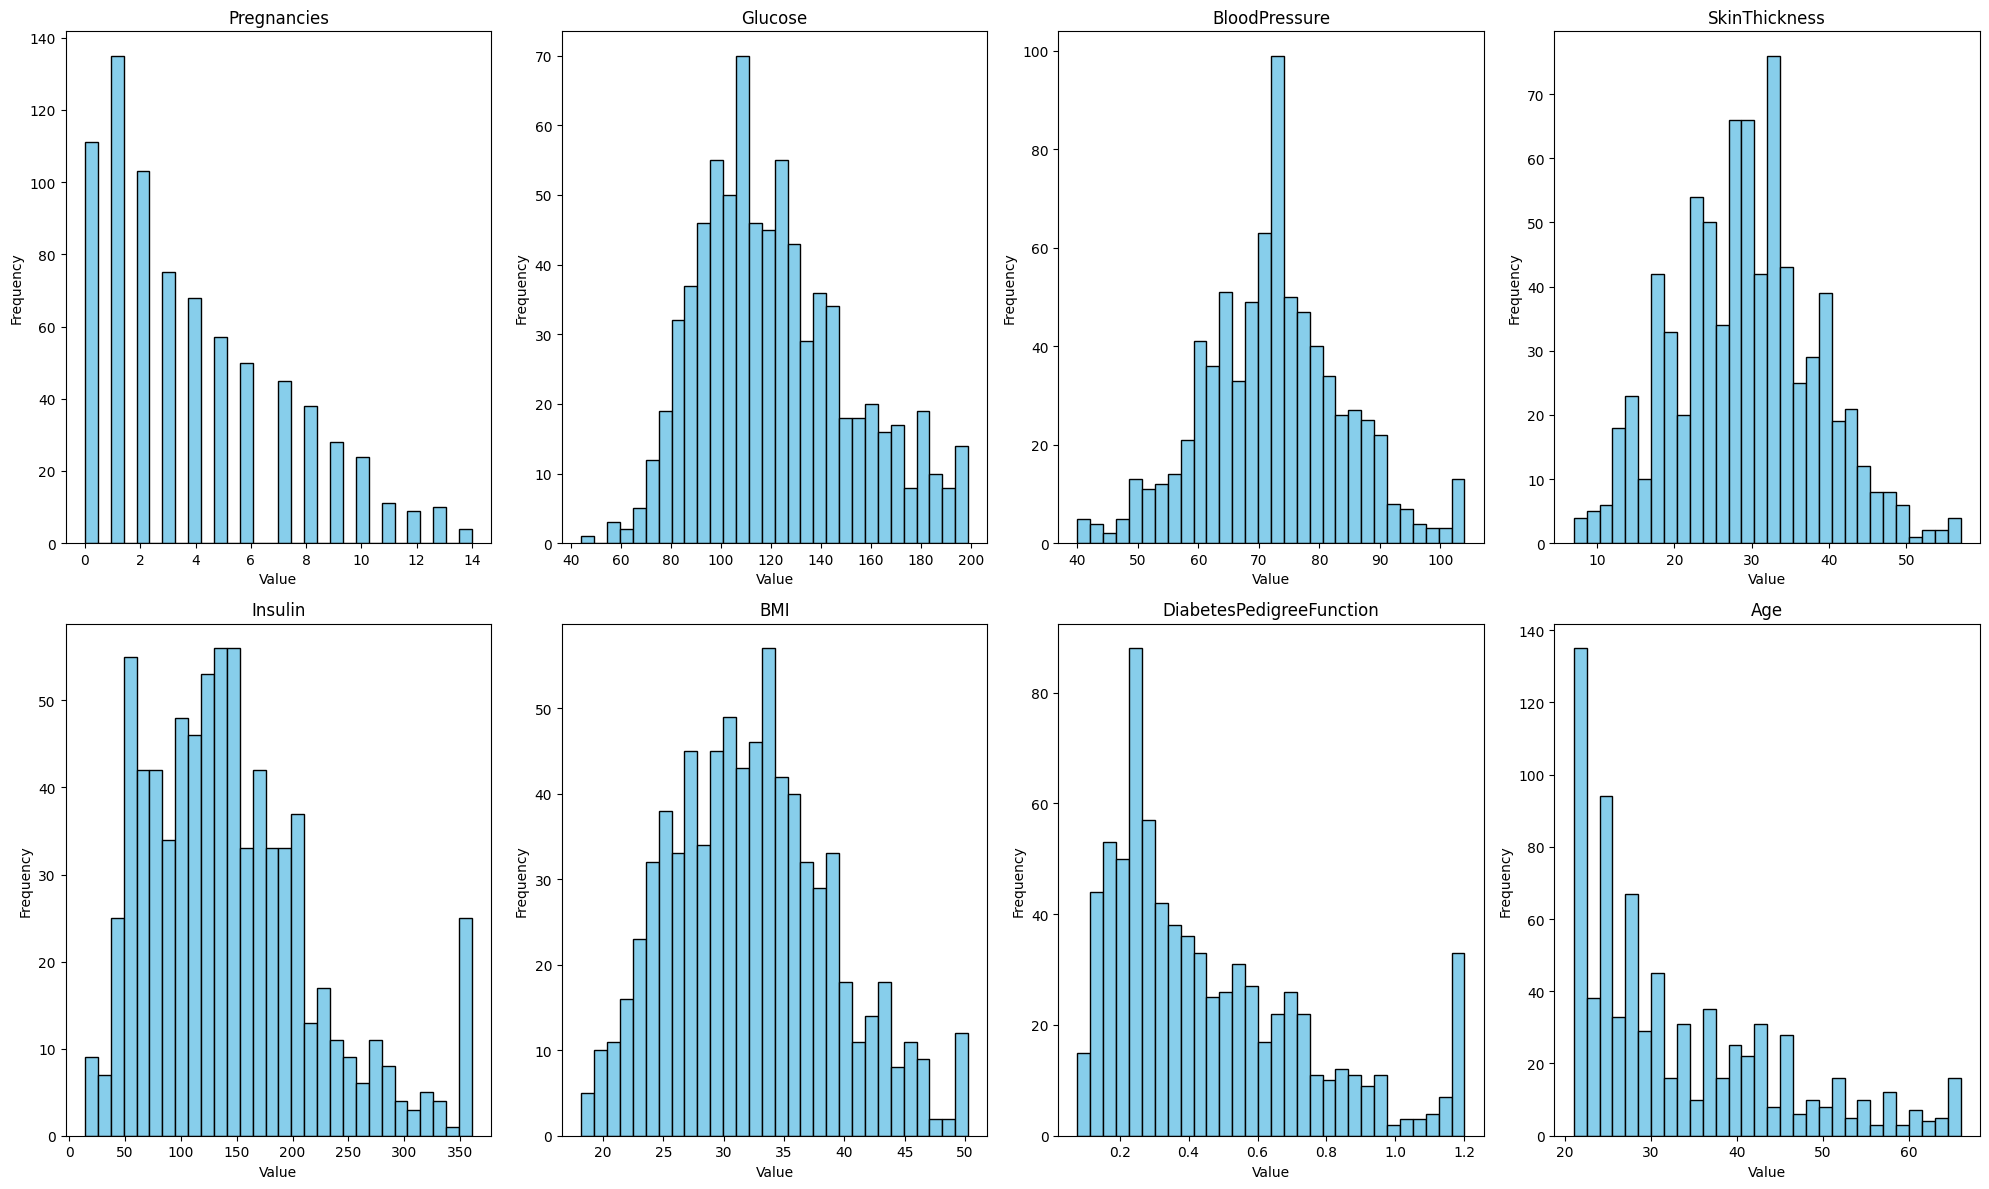

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
axes = axes.flatten()
for i, feature in enumerate(features):
    axes[i].hist(df_diabetes[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
for j in range(len(features), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

**Violin Plots of Features**

We use violin plots to visualize the distribution of features in the df_diabetes dataset. Each violin plot displays the distribution of data for a specific feature, providing insights into the underlying data distribution, spread, and potential outliers.

The violin plots show:

*   **Distribution:** The width of the plot at different values indicates the density of data points. Wider sections represent higher data density.
*   **Median:** The central line inside the violin represents the median value of the feature.
*   **Range:** The shape of the violin extends to the minimum and maximum values, showing the overall spread of the feature.
*   **Outliers:** The plots also help identify any potential outliers in the data.

Each subplot represents a feature, allowing for easy comparison between the features.

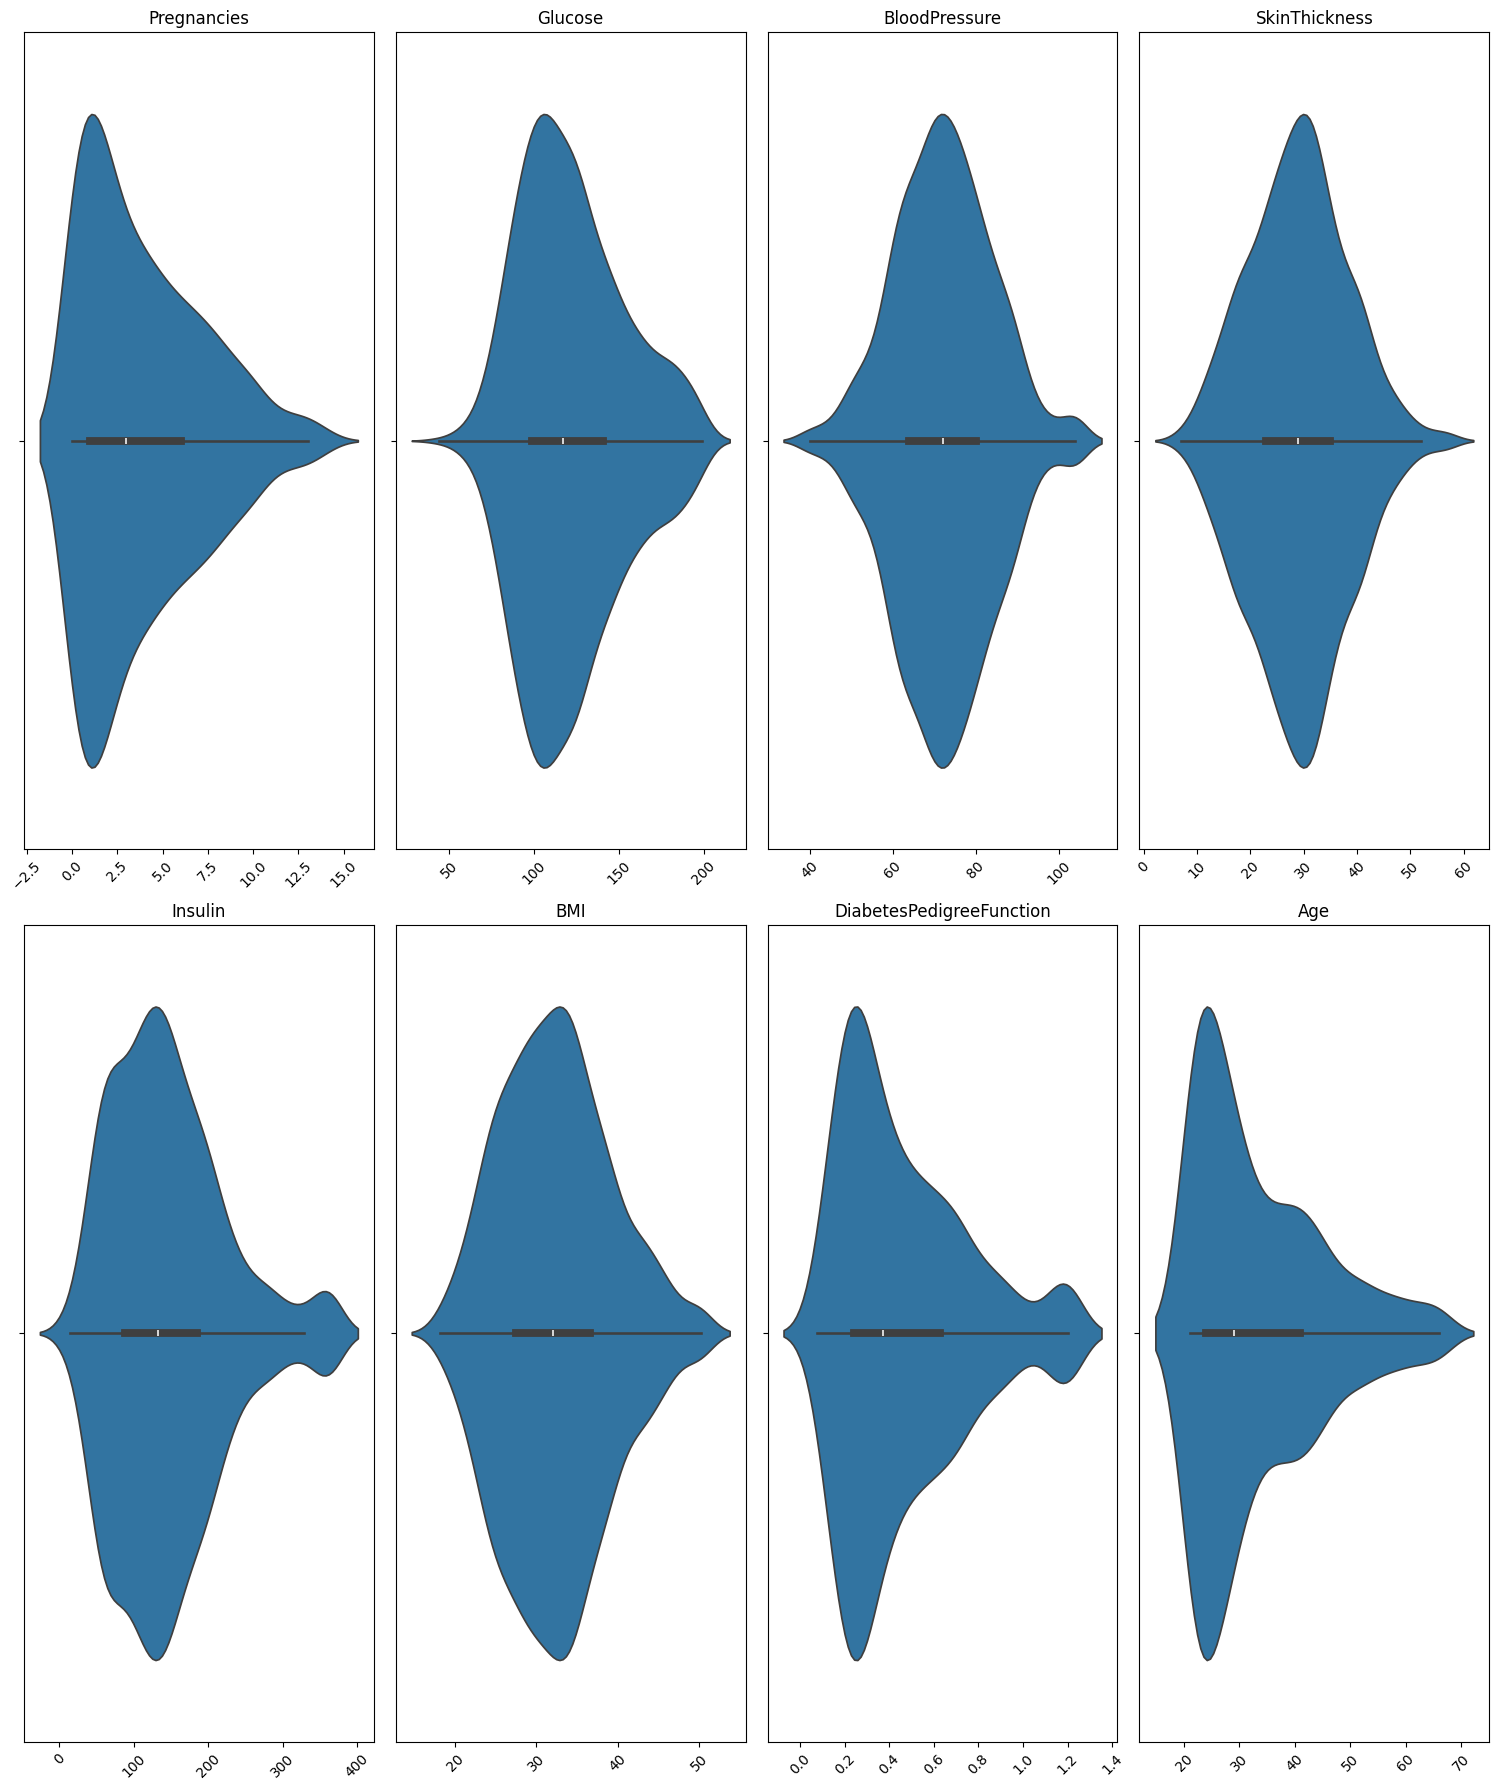

In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_long = df_diabetes[features].melt(var_name='Feature', value_name='Value')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 18))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='Value', data=df_long[df_long['Feature'] == feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

**Splitting the Dataset — Train & Test Sets**

To evaluate our models properly, we split the dataset into training and testing sets using an 80-20 ratio, while maintaining the original class distribution with stratify=y.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_diabetes.drop('Diabetes', axis=1)
y = df_diabetes['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


**X_train Before Standardization**

We examine the training set features prior to scaling to understand their original distribution and range.

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,30.6,168.2,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22
...,...,...,...,...,...,...,...,...
451,2,134.0,70.0,24.0,124.4,28.9,0.542,23
113,4,76.0,62.0,30.4,47.0,34.0,0.391,25
556,1,97.0,70.0,40.0,119.4,38.1,0.218,30
667,10,111.0,70.0,27.0,98.2,27.5,0.141,40


**X_test Before Standardization**

We examine the test set features prior to scaling to understand their original distribution and range.

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,28.4,197.325,27.40,0.294,40
672,10,68.0,104.0,23.0,49.000,35.50,0.285,47
700,2,122.0,76.0,27.0,200.000,35.90,0.483,26
630,7,114.0,64.0,28.0,96.400,27.40,0.732,34
81,2,74.0,61.6,22.6,45.000,27.42,0.102,22
...,...,...,...,...,...,...,...,...
32,3,88.0,58.0,11.0,54.000,24.80,0.267,22
637,2,94.0,76.0,18.0,66.000,31.60,0.649,23
593,2,82.0,52.0,22.0,115.000,28.50,1.200,25
425,4,184.0,78.0,39.0,277.000,37.00,0.264,31


**Feature Scaling using StandardScaler**

To bring all features onto the same scale, we apply Standard Scaling (mean = 0, standard deviation = 1). This is especially important for algorithms sensitive to feature magnitude, such as Logistic Regression, SVM, and KNN.

*   fit_transform() is applied on X_train to compute the mean and standard deviation, and then scale the data.
*   transform() is applied on X_test using the same statistics to avoid data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (614, 8)
y_train shape: (614,)
X_test shape: (154, 8)
y_test shape: (154,)


**X_train After Scaling**

We examine the scaled training features to ensure that all features have been standardized and have a mean of 0 and a standard deviation of 1.

In [ ]:
X_train

array([[-0.85433866, -1.0537382 , -0.85744066, ..., -0.77966619,
         0.4005788 , -0.7989446 ],
       [ 0.35992971,  0.14515355,  0.49347461, ..., -0.41737724,
        -0.09060042,  0.57346872],
       [-0.55077157, -0.55419997, -1.19516948, ...,  0.38267755,
        -0.83607812, -0.71316877],
       ...,
       [-0.85433866, -0.82062036, -0.18198303, ...,  0.86572949,
        -0.8604629 , -0.28428961],
       [ 1.87776518, -0.35438468, -0.18198303, ..., -0.73438007,
        -1.12869553,  0.57346872],
       [ 0.05636262,  0.74459943, -1.19516948, ..., -0.43247261,
        -0.6200986 ,  0.31614122]])

**X_test After Scaling**

We examine the scaled test features to ensure that all features have been standardized and have a mean of 0 and a standard deviation of 1.

In [ ]:
X_test

array([[ 0.9670639 ,  1.24413766, -0.68857626, ..., -0.74947545,
        -0.59571381,  0.57346872],
       [ 1.87776518, -1.78639428,  2.68871192, ...,  0.47324979,
        -0.62706568,  1.17389955],
       [-0.55077157,  0.01194336,  0.3246102 , ...,  0.53363128,
         0.06267536, -0.62739294],
       ...,
       [-0.55077157, -1.32015859, -1.70176271, ..., -0.58342634,
         2.56037399, -0.71316877],
       [ 0.05636262,  2.07670138,  0.49347461, ...,  0.69968038,
        -0.70022003, -0.19851378],
       [-0.85433866, -1.68648663,  0.49347461, ...,  0.1260562 ,
        -0.14982061, -1.0562721 ]])

**Model Setup and Initializations**

In this section, we initialize a variety of machine learning models that will be used for the diabetes prediction task. These include individual models like Logistic Regression (LR), Support Vector Machine (SVM), Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), and a Voting Classifier ensemble of these models.

*   **Logistic Regression (LR):**
    *   A linear model that predicts class probabilities using the logistic function.
    *   Uses class_weight='balanced' to penalize misclassifications from the minority class.
    *   max_iter=1000 ensures convergence during training.
*   **Support Vector Machine (SVM):**
    *   A powerful classifier that finds the optimal hyperplane to separate classes.
    *   probability=True allows output of probabilities (needed for soft voting).
    *   class_weight='balanced' handles class imbalance.
*   **Gaussian Naive Bayes (NB):**
    *   A probabilistic classifier based on Bayes’ theorem, assuming feature independence.
    *   Suitable for continuous features following a Gaussian distribution.
    *   No need for class weight adjustments here.
*   **K-Nearest Neighbors (KNN):**
    *   A non-parametric model that classifies a data point based on the majority label of its neighbors.
    *   Uses weights='uniform' and n_neighbors=5 by default.
*   **Voting Classifier (Ensemble):**
    *   Combines predictions from multiple classifiers to improve accuracy.
    *   Uses soft voting, which averages predicted class probabilities from each model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils.class_weight import compute_sample_weight
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
svm = SVC(probability=True, random_state=42, class_weight='balanced')
gnb = GaussianNB()
knn = KNeighborsClassifier(weights='uniform', n_neighbors=5)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('svm', svm),
        ('gnb', gnb),
        ('knn', knn)
    ],
    voting='soft'
)
models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "Gaussian Naive Bayes": gnb,
    "KNN": knn,
    "Voting Ensemble": voting_clf
}

**Model Evaluation Function**

We define a utility function to train and evaluate multiple classification models using a consistent set of performance metrics.

Metrics Used:

    *   Accuracy: Overall correctness of the model.
    *   Precision: How many predicted positives are actual positives.
    *   Recall: How many actual positives were correctly predicted.
    *   F1 Score: Harmonic mean of precision and recall.
    *   Confusion Matrix: Breakdown of true positives, true negatives, false positives, and false negatives.
    *   ROC AUC Score: Measures the model’s ability to distinguish between classes using predicted probabilities
        (only for models that support predict_proba).

This function trains each model on the training set and reports its performance on the test set. It's ideal for comparing multiple classifiers in a consistent, organized way.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
performance={}
performance_smote={}
def evaluate_models(models, X_train, X_test, y_train, y_test, smote):
    for name, model in models.items():
        print(f"\nModel: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_proba)
            print(f"ROC AUC:   {roc:.4f}")
        if smote:
            performance_smote[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1, "ROC AUC": roc, "Confusion Matrix": cm}
        else:
            performance[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1, "ROC AUC": roc, "Confusion Matrix": cm}
        print("-" * 50)

**Model Evaluation Results**

Here are some key takeaways from the evaluation of the models:

*   **Logistic Regression (LR):**
    *   A strong performer with a good balance between recall and precision. It handles positives fairly well and maintains a solid AUC.
*   **Support Vector Machine (SVM):**
    *   Identical results to Logistic Regression in this case, offering a balanced performance. Slightly lower AUC than LR but still strong overall.
*   **Gaussian Naive Bayes (GNB):**
    *   Lower across most metrics compared to LR/SVM. While still respectable, it lags in precision and F1, though AUC remains decent.
*   **K-Nearest Neighbors (KNN):**
    *   High precision but suffers from lower recall, meaning it misses more positives. AUC suggests weaker separation between classes.
*   **Voting Classifier (Ensemble):**
    *   Offers stability across metrics, making it a good all-around choice. Doesn’t outperform individual models but remains consistent and robust.

Logistic Regression and SVM currently lead in balanced performance, with Voting Ensemble closely trailing as a stable fallback. GNB and KNN may require tuning or additional preprocessing to improve recall and overall effectiveness.

In [ ]:
evaluate_models(models, X_train, X_test, y_train, y_test, False)


Model: Logistic Regression
Accuracy:  0.7403
Precision: 0.6061
Recall:    0.7407
F1 Score:  0.6667
Confusion Matrix:
[[74 26]
 [14 40]]
ROC AUC:   0.8154
--------------------------------------------------

Model: SVM
Accuracy:  0.7403
Precision: 0.6061
Recall:    0.7407
F1 Score:  0.6667
Confusion Matrix:
[[74 26]
 [14 40]]
ROC AUC:   0.8106
--------------------------------------------------

Model: Gaussian Naive Bayes
Accuracy:  0.7078
Precision: 0.5738
Recall:    0.6481
F1 Score:  0.6087
Confusion Matrix:
[[74 26]
 [19 35]]
ROC AUC:   0.7935
--------------------------------------------------

Model: KNN
Accuracy:  0.7143
Precision: 0.6042
Recall:    0.5370
F1 Score:  0.5686
Confusion Matrix:
[[81 19]
 [25 29]]
ROC AUC:   0.7543
--------------------------------------------------

Model: Voting Ensemble
Accuracy:  0.7338
Precision: 0.6102
Recall:    0.6667
F1 Score:  0.6372
Confusion Matrix:
[[77 23]
 [18 36]]
ROC AUC:   0.8039
--------------------------------------------------


**Applying SMOTE to Balance the Dataset**

To address the class imbalance in the training data, we used SMOTE (Synthetic Minority Oversampling Technique). This technique generates synthetic samples for the minority class to balance the distribution.

We check the class distribution in the training set before and after applying SMOTE.

The number of samples in the minority class has been increased to match the majority class, helping improve model performance on imbalanced datasets.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f"Before SMOTE: {Counter(y_train)}")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"After SMOTE: {Counter(y_train_smote)}")

Before SMOTE: Counter({0: 400, 1: 214})
After SMOTE: Counter({0: 400, 1: 400})


**Model Definitions After SMOTE**

After balancing the training data using SMOTE, we redefined our machine learning models to be trained on the synthetic, balanced dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils.class_weight import compute_sample_weight
lr_smote = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
svm_smote = SVC(probability=True, random_state=42, class_weight='balanced')
gnb_smote = GaussianNB()
knn_smote = KNeighborsClassifier(weights='uniform', n_neighbors=5)
voting_clf_smote = VotingClassifier(
    estimators=[
        ('lr_smote', lr_smote),
        ('svm_smote', svm_smote),
        ('gnb_smote', gnb_smote),
        ('knn_smote', knn_smote)
    ],
    voting='soft'
)
models_smote = {
    "Logistic Regression Smote": lr_smote,
    "SVM Smote": svm_smote,
    "Gaussian Naive Bayes Smote": gnb_smote,
    "KNN Smote": knn_smote,
    "Voting Ensemble Smote": voting_clf_smote
}

**Model Evaluation Results (After Applying SMOTE)**

Here are some key takeaways from the evaluation of the models after applying SMOTE:

*   **Logistic Regression (LR):**
    *   Slight drop in accuracy post-SMOTE, but recall improved, helping to detect more positives. A well-balanced option overall.
*   **Support Vector Machine (SVM):**
    *   Maintains top-tier performance with slightly improved recall and precision over non-SMOTE version. Remains a reliable choice.
*   **Gaussian Naive Bayes (GNB):**
    *   Notable gain in recall, making it much better at identifying positives. Precision drops slightly, but it now offers a solid F1 Score.
*   **K-Nearest Neighbors (KNN):**
    *   SMOTE helps increase recall but sacrifices accuracy and precision. The lowest AUC among all models suggests room for tuning or enhancement.
*   **Voting Classifier (Ensemble):**
    *   Gains noticeable recall and F1 improvement after SMOTE. Very balanced overall and a strong ensemble contender with consistent metrics.

Post-SMOTE, Voting Ensemble and SVM show the best balance of recall and precision. GNB gains significantly in recall, making it a surprising contender, while KNN continues to lag and may need further tuning.

In [ ]:
evaluate_models(models_smote, X_train_smote, X_test, y_train_smote, y_test, True)


Model: Logistic Regression Smote
Accuracy:  0.7338
Precision: 0.6066
Recall:    0.6852
F1 Score:  0.6435
Confusion Matrix:
[[76 24]
 [17 37]]
ROC AUC:   0.8117
--------------------------------------------------

Model: SVM Smote
Accuracy:  0.7403
Precision: 0.6167
Recall:    0.6852
F1 Score:  0.6491
Confusion Matrix:
[[77 23]
 [17 37]]
ROC AUC:   0.8078
--------------------------------------------------

Model: Gaussian Naive Bayes Smote
Accuracy:  0.7013
Precision: 0.5541
Recall:    0.7593
F1 Score:  0.6406
Confusion Matrix:
[[67 33]
 [13 41]]
ROC AUC:   0.7991
--------------------------------------------------

Model: KNN Smote
Accuracy:  0.6623
Precision: 0.5156
Recall:    0.6111
F1 Score:  0.5593
Confusion Matrix:
[[69 31]
 [21 33]]
ROC AUC:   0.7348
--------------------------------------------------

Model: Voting Ensemble Smote
Accuracy:  0.7403
Precision: 0.6029
Recall:    0.7593
F1 Score:  0.6721
Confusion Matrix:
[[73 27]
 [13 41]]
ROC AUC:   0.7985
--------------------------

**Performance Metrics Visualization: Before vs After SMOTE**

This visualization compares the performance of multiple classification models on the diabetes dataset, both before and after applying SMOTE (Synthetic Minority Oversampling Technique). It helps evaluate how SMOTE affects various performance metrics and the distribution of predicted outcomes.

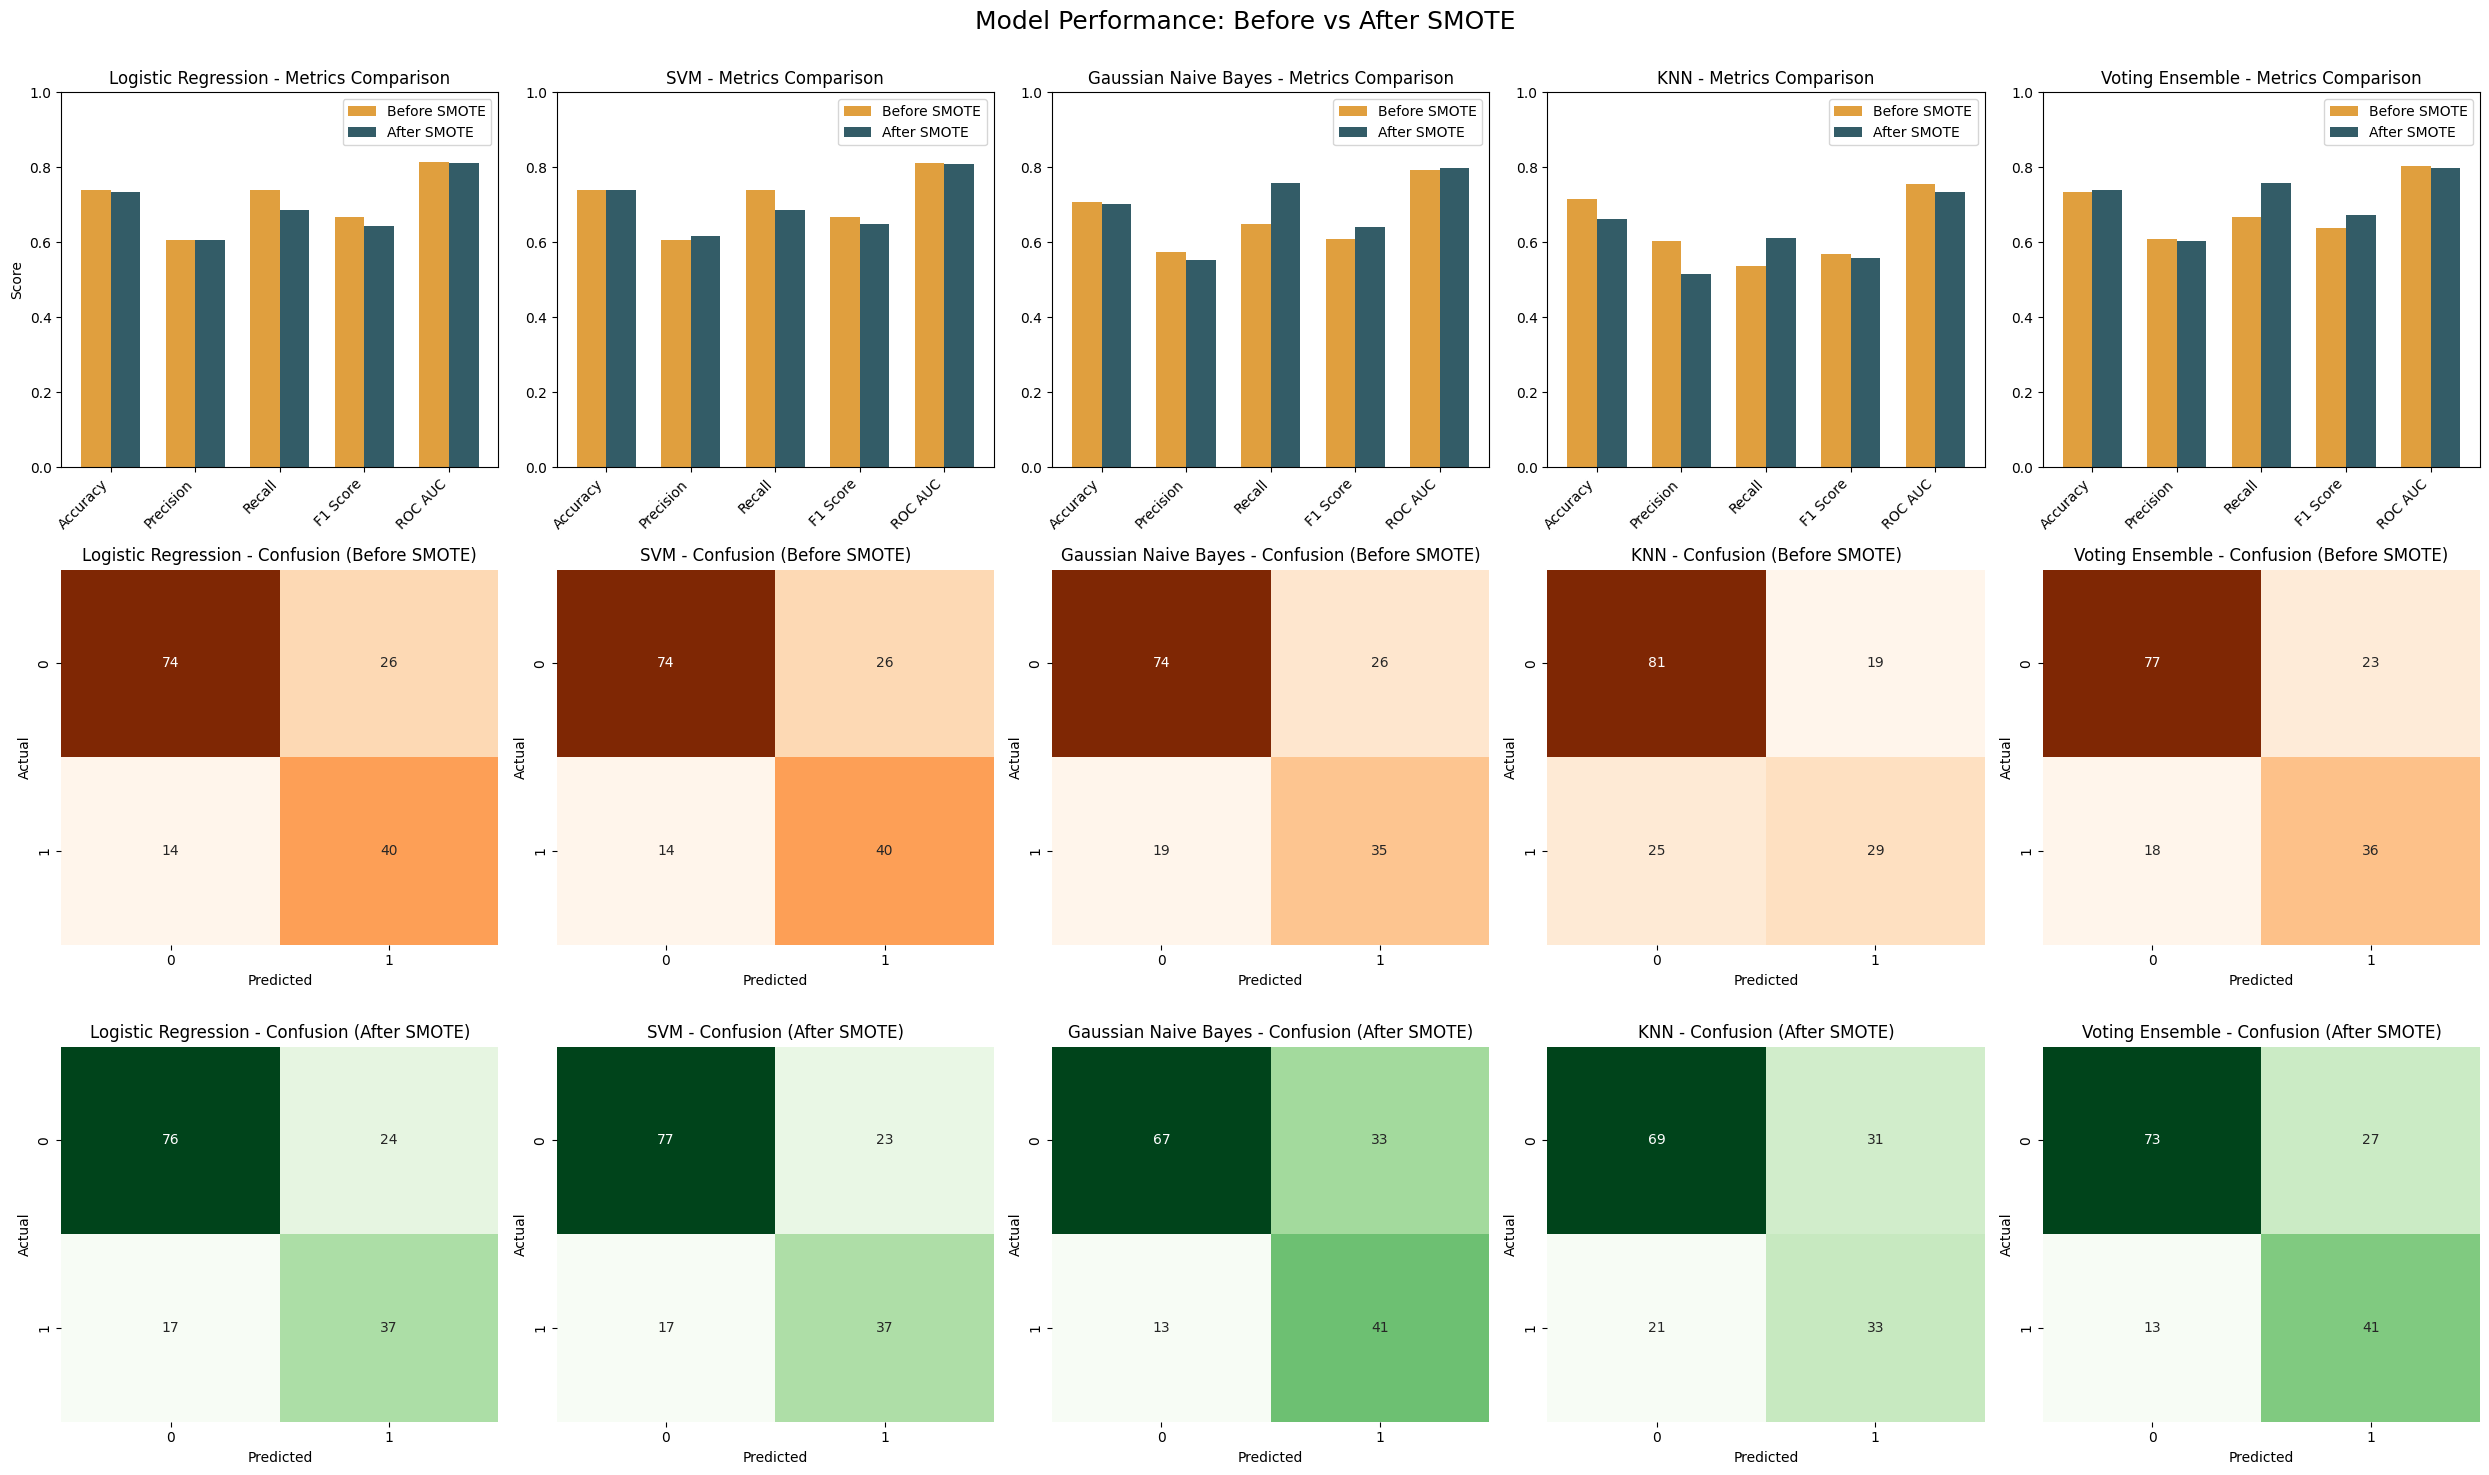

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models_list = list(performance.keys())
fig, axs = plt.subplots(3, len(models_list), figsize=(5 * len(models_list), 15))
if len(models_list) == 1:
    axs = np.expand_dims(axs, axis=1)
for i, model in enumerate(models_list):
    # Extract metrics before and after SMOTE
    before = [performance[model][metric] for metric in metrics_list]
    after = [performance_smote[f"{model} Smote"][metric] for metric in metrics_list]
    # Bar chart: metric comparison before vs after SMOTE
    x = np.arange(len(metrics_list))
    width = 0.35
    axs[0, i].bar(x - width/2, before, width, label='Before SMOTE', color='#e09f3e')
    axs[0, i].bar(x + width/2, after, width, label='After SMOTE', color='#335c67')
    axs[0, i].set_title(f'{model} - Metrics Comparison')
    axs[0, i].set_xticks(x)
    axs[0, i].set_xticklabels(metrics_list, rotation=45, ha='right')
    axs[0, i].set_ylim(0, 1)
    if i == 0:
        axs[0, i].set_ylabel('Score')
    axs[0, i].legend()
    # Confusion matrices before and after SMOTE
    cm_before = performance[model]["Confusion Matrix"]
    cm_after = performance_smote[f"{model} Smote"]["Confusion Matrix"]
    sns.heatmap(cm_before, annot=True, fmt='d', cmap='Oranges', ax=axs[1, i], cbar=False)
    axs[1, i].set_title(f'{model} - Confusion (Before SMOTE)')
    axs[1, i].set_xlabel('Predicted')
    axs[1, i].set_ylabel('Actual')
    sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens', ax=axs[2, i], cbar=False)
    axs[2, i].set_title(f'{model} - Confusion (After SMOTE)')
    axs[2, i].set_xlabel('Predicted')
    axs[2, i].set_ylabel('Actual')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Model Performance: Before vs After SMOTE', fontsize=18)
plt.show()

**Plotting ROC Curves for Model Evaluation**

To evaluate the performance of our models, we can use Receiver Operating Characteristic (ROC) curves. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values of a classifier. The area under the curve (AUC) quantifies the overall ability of the model to discriminate between the positive and negative classes, with a higher AUC indicating better performance.

We plot the ROC curve for each model and calculate its AUC score to compare their performance.

Insights & Model Comparison:

*   Best Performers:
    *  Logistic Regression and Support Vector Machine (SVM) tied for the highest AUC of 0.81.
    *  These models demonstrate superior ability to classify the data, maintaining strong discrimination even after synthetic oversampling with SMOTE.
    *  Both models exhibit balanced performance across metrics and show a solid ability to identify positives without compromising on precision.
*   Strong Contenders:
    *   Voting Ensemble and Gaussian Naive Bayes reached an AUC of 0.80, closely following the top performers.
    *   Voting Ensemble benefits from aggregating predictions from multiple models, offering a reliable and stable approach in uncertain scenarios. The ensemble combines the strengths of various classifiers for a more robust solution.
    *   Gaussian Naive Bayes performed admirably despite its simpler nature. It achieved decent precision and recall, proving that less complex models can still be effective when trained on balanced data.
*   Least Effective:
    *   K-Nearest Neighbors (KNN) had the lowest AUC of 0.74, indicating a weaker ability to differentiate between classes.
    *   KNN's lower discriminatory power may be due to its sensitivity to high-dimensional spaces or overlapping class boundaries, which are further complicated by SMOTE.
    *   While KNN offers decent precision, its recall and overall AUC suggest it may not be the best choice for this dataset.

The Logistic Regression and SVM models are the best performers in terms of AUC and overall classification accuracy. Voting Ensemble and Gaussian Naive Bayes are solid strong contenders, offering reliable performance. On the other hand, KNN may not be the most suitable model for this dataset due to its lower AUC and weaker class separation ability.

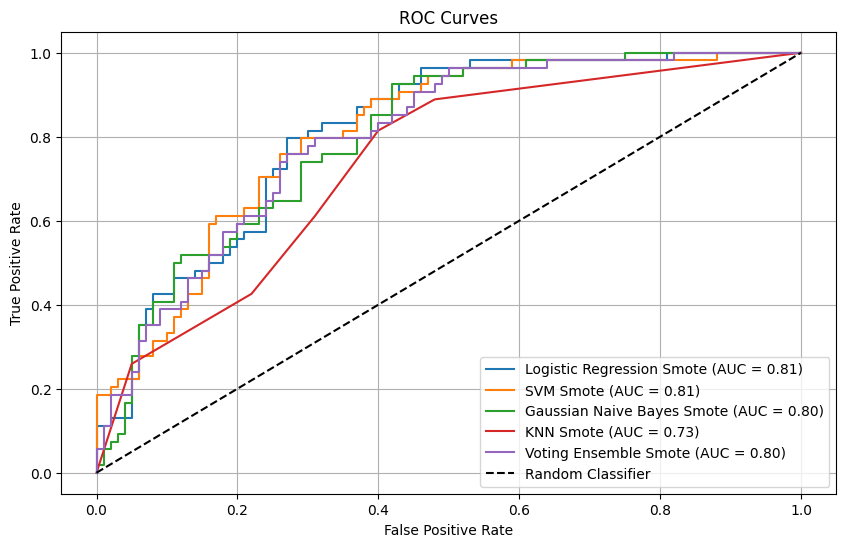

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_roc_curves(models_smote, X_test, y_test)

**Interactive Diabetes Prediction**

This section lets you manually enter patient health data and select one of the trained models to predict the likelihood of diabetes. The model will return a diagnosis along with the prediction probability.

In [ ]:
def get_user_input():
    print("\nEnter the following values for diabetes prediction:")
    try:
        Pregnancies = int(input("Number of Pregnancies: "))
        Glucose = float(input("Glucose Level: "))
        BloodPressure = float(input("Blood Pressure (mm Hg): "))
        SkinThickness = float(input("Skin Thickness (mm): "))
        Insulin = float(input("Insulin Level (mu U/ml): "))
        BMI = float(input("BMI (Body Mass Index): "))
        DiabetesPedigreeFunction = float(input("Diabetes Pedigree Function: "))
        Age = int(input("Age: "))
    except ValueError:
        print("Invalid input. Please enter valid numeric values.")
        return None
    user_df = pd.DataFrame([{
        'Pregnancies': Pregnancies,
        'Glucose': Glucose,
        'BloodPressure': BloodPressure,
        'SkinThickness': SkinThickness,
        'Insulin': Insulin,
        'BMI': BMI,
        'DiabetesPedigreeFunction': DiabetesPedigreeFunction,
        'Age': Age
    }])
    return user_df
def choose_model():
    print("\nChoose the model for prediction:")
    print("1. Logistic Regression")
    print("2. SVM")
    print("3. Gaussian Naive Bayes")
    print("4. KNN")
    print("5. Voting Ensemble")
    choice = input("Enter the number corresponding to the model: ").strip()
    if choice == "1":
        return models_smote["Logistic Regression Smote"]
    elif choice == "2":
        return models_smote["SVM Smote"]
    elif choice == "3":
        return models_smote["Gaussian Naive Bayes Smote"]
    elif choice == "4":
        return models_smote["KNN Smote"]
    elif choice == "5":
        return models_smote["Voting Ensemble Smote"]
    else:
        print("Invalid choice. Defaulting to Logistic Regression Smote.")
        return models_smote["Logistic Regression Smote"]
user_data = get_user_input()
if user_data is not None:
    selected_model = choose_model()
    user_scaled = scaler.transform(user_data)
    prediction = selected_model.predict(user_scaled)[0]
    probability = selected_model.predict_proba(user_scaled)[0][1]
    print("\nPrediction Result:")
    if prediction == 1:
        print(f"The person is likely to have DIABETES with probability {probability:.2f}")
    else:
        print(f"The person is likely to be HEALTHY with probability {1 - probability:.2f}")


Enter the following values for diabetes prediction:
Number of Pregnancies: 3
Glucose Level: 210
Blood Pressure (mm Hg): 100
Skin Thickness (mm): 32
Insulin Level (mu U/ml): 80
BMI (Body Mass Index): 27
Diabetes Pedigree Function: 0.3
Age: 35

Choose the model for prediction:
1. Logistic Regression
2. SVM
3. Gaussian Naive Bayes
4. KNN
5. Voting Ensemble
Enter the number corresponding to the model: 5

Prediction Result:
The person is likely to have DIABETES with probability 0.80


**Check Current Working Directory**

Before saving models with pickle, it’s useful to verify the current working directory.

In [ ]:
pwd

'/content/drive/MyDrive/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Diabetes'

**Saving Models with Pickle**

Finally, we save each trained model from the models and models_smote dictionaries into .pkl files. These models can later be loaded into a Flask application for making predictions based on user input.

In [ ]:
import pickle
for model in models.values():
    filename = f'diabetes_{model.__class__.__name__}_model.pkl'
    print(filename)
    pickle.dump(model, open(filename, 'wb'))
for model in models_smote.values():
    filename = f'diabetes_{model.__class__.__name__}_smote_model.pkl'
    print(filename)
    pickle.dump(model, open(filename, 'wb'))

diabetes_LogisticRegression_model.pkl
diabetes_SVC_model.pkl
diabetes_GaussianNB_model.pkl
diabetes_KNeighborsClassifier_model.pkl
diabetes_VotingClassifier_model.pkl
diabetes_LogisticRegression_smote_model.pkl
diabetes_SVC_smote_model.pkl
diabetes_GaussianNB_smote_model.pkl
diabetes_KNeighborsClassifier_smote_model.pkl
diabetes_VotingClassifier_smote_model.pkl


**Saving Processed Diabetes Dataset**

We export the preprocessed diabetes dataset to a CSV file named diabetes_processed.csv without including the index column.

In [ ]:
df_diabetes.to_csv('diabetes_processed.csv', index=False)